# Validación de la respuesta teórica al escalón de un circuito RLC 




En esta sección se presenta el procedimiento y el código para la obtención de la respueta al escalón de un circuito RLC serie, para la validación de conceptos teóricos como la función de transferencia y la respuesta al escalón. El circuto se compone de un transformador de 127 a 12 volts con una corriente de salida máxima de 0.25 Amperes, cuya bobina primara es la que te utiliza como la inductancia, la resistencia es un potenciómetro de 5 $K\Omega$ y el capacitor es electrolítico de 1 $\mu F$. El escalón tiene una amplitud de 1.63 Volts generados por medio del convertidor digital-analógico de una placa Arduino Due. Los elementos mencionados se muestran en la  {numref}`RLC_step` .


```{figure} /images/RLC.jpg
:height: 400px
:name: RLC_step
Circuito RLC serie.
```

##  Código para la tarjeta Ardino Due

El código para la adquisición de datos se encuentra en la siguiente liga:

https://raw.githubusercontent.com/LuisGerardo2204/Open_source_data_acquisition/refs/heads/main/Data_aquisition/Data_aquisition.ino

El código que se encuentra en la liga anterior se debe copiar, pegar y compilar en la interfaz de Arduino, seleccionando la tarjeta Arduino Due e instalando previo a la compilación, las siguientes tarjetas y librerías:

* Tarjetas: Arduino Sam Boards
```{figure} /images/tarjetas_SAM.png
:height: 200px
:name: Sam_board
Instalación de la tarjeta arduino Due.
```

* Librerias: Scheduler

```{figure} /images/scheduler.png
:height: 200px
:name: Sam_board2
Instalación de la librería Scheduler.

El diagrama a blouqes de la interconexión del experimento, la tarjeta y la computadora se muestra en la {numref}`RLC_USB`. 

```{figure} /images/diagrama_USB_Due.png
:height: 400px
:name: RLC_USB
Diagrama de bloques del sistema de adquisición de datos.
```

## Código MATLAB para la adquisición de los datos experimentales

Las siguientes líneas de código se usan para establecer una comunicación por puerto USB con la tarjeta Arduino Due y el circuito RLC serie:


In [1]:
clear
close all
%Se establece el número de muestras y la frecuencia de muestreo
n_muestras=2^10; % Se establece en potencias de 2 el número de muestras
freq_muestreo=5000; % 5 KHz
% El tiempo total de adqusición de datos es n_muestras/freq_muestreo segundos
% Se establece la comunicación con la tarjeta usando el puerto COM adecuado
% La siguiente línea muestra los puertos COM disponibles, de esa lista se elige la asiganda al Arduino Due
serialportlist("all")
%Se crea el puero virtual de comunicación
s = serialport("COM4",2000000,"Timeout",5); 

ans = "COM4"

Una vez establecido la comunicación USB, se procede a enviar el valor numérico del numero de muestras a tomar y la frecuencia de muestreo. Se hace la adquisión de los datos, al ejecutar las siguientes líneas:

In [2]:
writeline(s,string(n_muestras)+ '\n' + string(freq_muestreo) + '\n')
disp('Adquiriendo señal.');
datos=[];

for i=1:n_muestras/256
    datos=[datos read(s,512,"uint16")];
    disp('.');
end 

disp('Adquisición de datos completa... Muestras listas para ser procesadas.');

Adquiriendo señal.
.
.
.
.
Adquisición de datos completa... Muestras listas para ser procesadas.


La función de transferencia del sistema es:

$$
 \frac{V_C(s)}{V_s(s)}=\frac{\frac{1}{LC}}{\left(s^2+\frac{R}{L}s+\frac{1}{LC}\right)}
$$

In [3]:
R=1600;
C=1.1*(10^(-6));
L=15.1;

num=[1.645/(L*C)];
den=[1 R/L 1/(L*C)];
G=tf(num,den)


G =
 
        9.904e04
  ---------------------
  s^2 + 106 s + 6.02e04
 
Continuous-time transfer function.


Así, la respuesta al escalón teórica es comparada con la experimental, generando una gráfica que contrasta la respuesta teórica con los datos adquiridos por la tarjeta Arduino Due.

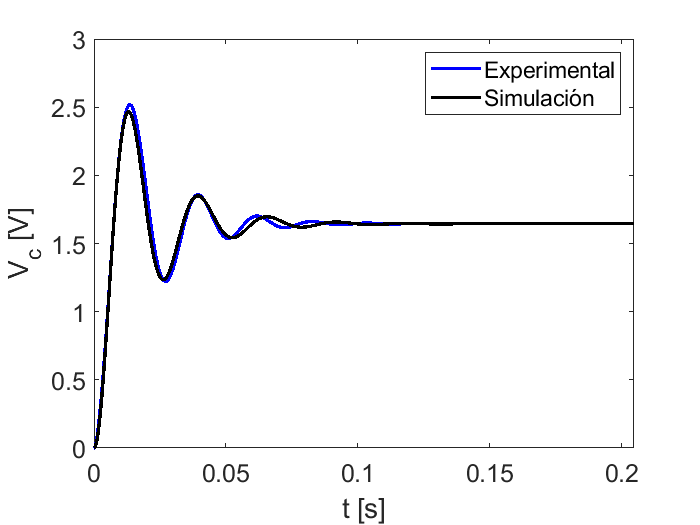

In [4]:
t=[0:1/freq_muestreo:(n_muestras-1)*(1/freq_muestreo)];
adq=datos(find(datos<(2^13)));
clear device
v_c=((3.3/4095)*adq);
plot(t,v_c,"-b",'LineWidth',2)
hold on
grid
[y,to]=step(G,t);

plot(to,y,'-k','LineWidth',2)
grid
axis([0 1*max(t),0 3]) 
legend('Experimental','Simulación')
xlabel('t [s]')
ylabel('V_c [V]')
set(gca,'FontSize',15)

## Código completo en lenguaje MATLAB 

ans = "COM4"

Adquiriendo señal.
.
.
.
.
Adquisición de datos completa... Muestras listas para ser procesadas.

G =
 
        9.904e04
  ---------------------
  s^2 + 106 s + 6.02e04
 
Continuous-time transfer function.


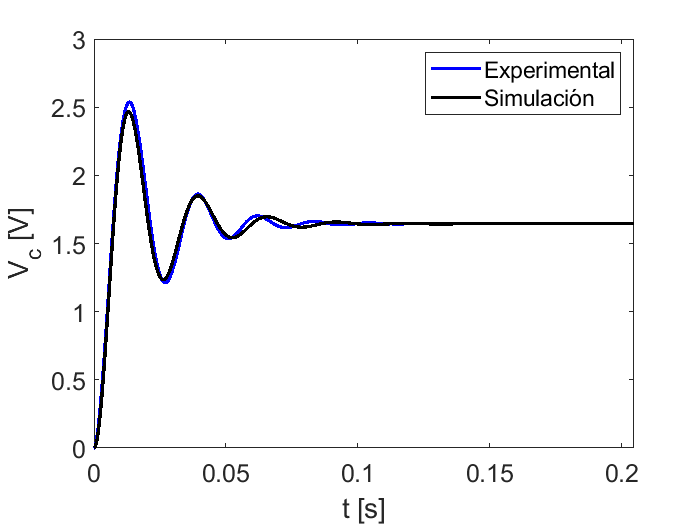

In [7]:
clear
close all
%Se establece el número de muestras y la frecuencia de muestreo
n_muestras=2^10; % Se establece en potencias de 2 el número de muestras
freq_muestreo=5000; % 5 KHz
% El tiempo total de adqusición de datos es n_muestras/freq_muestreo segundos
% Se establece la comunicación con la tarjeta usando el puerto COM adecuado
% La siguiente línea muestra los puertos COM disponibles, de esa lista se elige la asiganda al Arduino Due
serialportlist("all")
%Se crea el puero virtual de comunicación
s = serialport("COM4",2000000,"Timeout",5); 
writeline(s,string(n_muestras)+ '\n' + string(freq_muestreo) + '\n')
disp('Adquiriendo señal.');
datos=[];

for i=1:n_muestras/256
    datos=[datos read(s,512,"uint16")];
    disp('.');
end 

disp('Adquisición de datos completa... Muestras listas para ser procesadas.');
R=1600;
C=1.1*(10^(-6));
L=15.1;

num=[1.645/(L*C)];
den=[1 R/L 1/(L*C)];
G=tf(num,den)
t=[0:1/freq_muestreo:(n_muestras-1)*(1/freq_muestreo)];
adq=datos(find(datos<(2^13)));
clear device
v_c=((3.3/4095)*adq);
plot(t,v_c,"-b",'LineWidth',2)
hold on
grid
[y,to]=step(G,t);

plot(to,y,'-k','LineWidth',2)
grid
axis([0 1*max(t),0 3]) 
legend('Experimental','Simulación')
xlabel('t [s]')
ylabel('V_c [V]')
set(gca,'FontSize',15)


## Código completo en Octave

In [ ]:
clear
close all
clc
pkg load instrument-control
pkg load signal
pkg load control

s = serial("COM4",2000000);

n_muestras=2^10;
frec_muestreo=5000;
fopen(s);


srl_write(s,int2str (n_muestras)); 
srl_write(s,"\n"); 
srl_write(s,int2str (frec_muestreo)); 
fwrite(s,"\n"); 

datos=[];
datos_leidos=[];

for i=1:n_muestras/256
  datos_leidos=fread(s,512,"uint16");
  datos=[datos datos_leidos];
end 
fclose(s)
clear s

t=[0:1/frec_muestreo:(n_muestras-1)*(1/frec_muestreo)];
adq=datos(find(datos<(2^13)));

v_c=((3.3/4095)*cast(adq,"single"));

figure
plot(t,v_c,'LineWidth',2)
 
hold on

R=1600;
C=1.1*(10^(-6));
L=15.1;

num=[1.645/(L*C)];
den=[1 R/L 1/(L*C)];
G=tf(num,den)

[y,to]=step(G,t);

plot(to,y,'-k','LineWidth',2)
grid

legend('Experimental','Simulation')
set(gca,'defaulttextinterpreter','latex')
  set(get(gca,'XLabel'),'String','t [s]',...
                    'FontName','Arial',...
                    'FontAngle','normal',...
                    'FontSize',30)
% 
                
         set(get(gca,'YLabel'),'String','V_C [V]',...
                    'FontName','Arial',...
                    'FontAngle','normal',...
                    'FontSize',30)
             
    set(gca,'FontSize',30)
set(gcf,'Visible','on')